# Frame Overlap: Analyzing Neutron Time-of-Flight Data

This tutorial demonstrates how to use the `frame_overlap` Python package to analyze neutron Time-of-Flight (ToF) data. The package provides tools for data preparation, kernel generation, Wiener deconvolution, parameter optimization, and visualization.

In [1]:
from frame_overlap import (
    read_tof_data,
    generate_kernel,
    apply_filter,
    chi2_analysis,
    plot_analysis,
    optimize_parameters
)
import numpy as np
import matplotlib.pyplot as plt

## Loading and Preparing Data

In [2]:
# Read the ToF data from a CSV file
t_signal, signal, errors, stacks = read_tof_data('iron_powder.csv', threshold=30)

## Generating the Kernel

In [3]:
# Generate a kernel with specified number of pulses and pulse duration
t_kernel, kernel = generate_kernel(n_pulses=5, pulse_duration=200)

## Applying Wiener Deconvolution

In [4]:
# Apply Wiener deconvolution to the signal
observed_poisson, reconstructed = apply_filter(
    signal,
    kernel,
    stats_fraction=0.2,
    noise_power=0.05
)

## Analyzing the Results

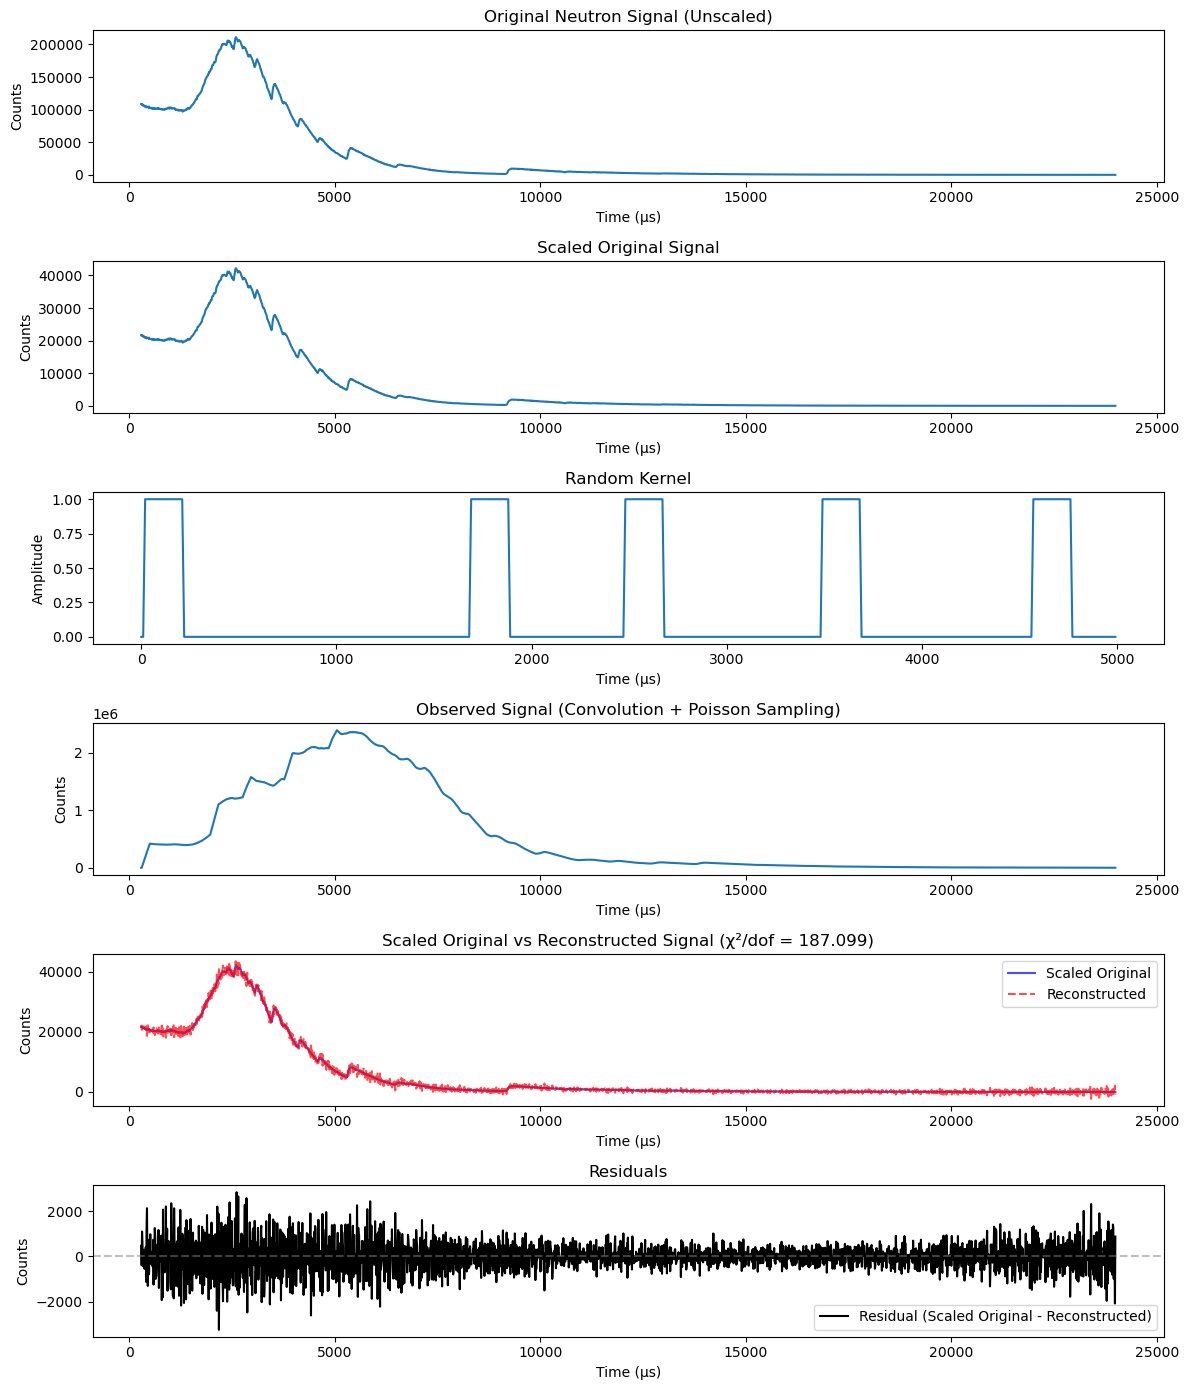

In [5]:
# Scale the original signal for comparison
scaled_original = signal * 0.2

# Calculate chi-squared statistics
chi2, chi2_per_dof = chi2_analysis(
    scaled_original,
    reconstructed,
    np.sqrt(observed_poisson)
)

# Plot the analysis results
plot_analysis(
    t_signal,
    signal,
    scaled_original,
    t_kernel,
    kernel,
    observed_poisson,
    reconstructed,
    scaled_original - reconstructed,
    chi2_per_dof
)

## Optimizing Parameters

In [6]:
# Optimize model parameters based on the signal
result = optimize_parameters(t_signal, signal)

# Print the optimization report
result

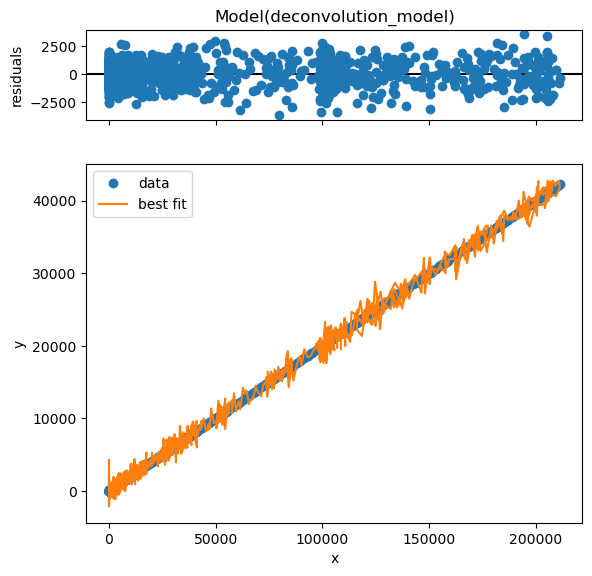

In [7]:
result.plot();

# Check the new fit using `nbragg`

In [6]:
import nbragg

In [7]:
data = nbragg.Data.from_counts("iron_powder.csv","openbeam.csv",L=9,tstep=10e-6)

<Axes: xlabel='wavelength [Å]', ylabel='Transmission'>

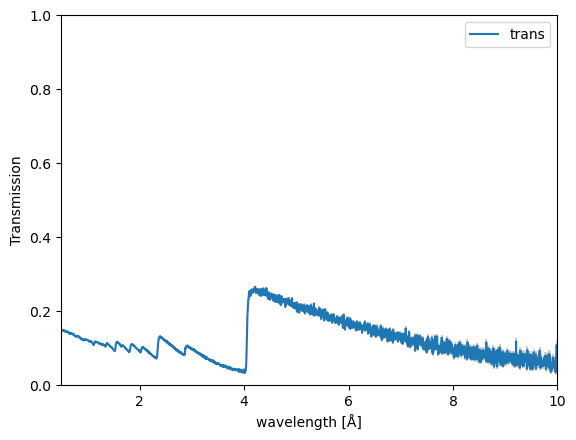

In [8]:
data.plot()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


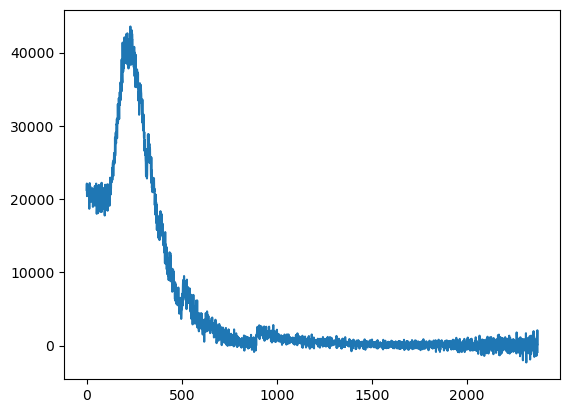

In [11]:
%pylab inline
plot(reconstructed)